In [1]:
%matplotlib inline

In [2]:
import os 
import pathlib

In [3]:
from dateutil.relativedelta import relativedelta

In [4]:
from matplotlib import pyplot as plt

In [5]:
import numpy as np
import pandas as pd 

In [6]:
import xarray as xr

In [7]:
HOME = pathlib.Path.home()

In [8]:
dict_vars = {}
dict_vars['PRECIP'] = 'tprate'
dict_vars['SST'] = 'sst'
dict_vars['T2M'] = 't2m'
dict_vars['Z850'] = 'z'

In [23]:
def demean(x): 
    return x - x.mean('time')

In [24]:
model = 'ecmwf'

In [25]:
vars_name =  dict_vars['SST']

In [26]:
varcode = 'T2M'

In [27]:
dpath = HOME / 'drives' / 'auck_projects' / 'END19101' / 'Working' / 'data' / 'hindcasts' / model / varcode
fname = list(dpath.glob("{}_hindcasts_1993_2016_{}.nc".format(varcode, model)))

In [28]:
fname

[PosixPath('/home/nicolasf/drives/auck_projects/END19101/Working/data/hindcasts/ecmwf/T2M/T2M_hindcasts_1993_2016_ecmwf.nc')]

In [29]:
dset_raw = xr.open_dataset(fname[0])

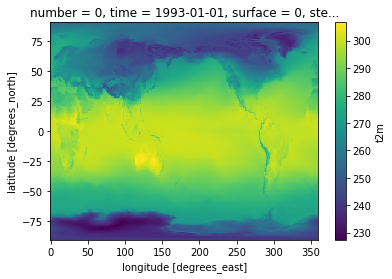

In [31]:
dset_raw.isel(time=0, step=0, number=0)['t2m'].plot()

In [ ]:
# for model in ['ukmo','meteo_france','cmcc','dwd']: 
for model in ['ecmwf']: 

    for varcode in ['SST','Z850','T2M','PRECIP']: 
        var_name = dict_vars[varcode]
        dpath = HOME / 'drives' / 'auck_projects' / 'END19101' / 'Working' / 'data' / 'hindcasts' / model / varcode
        fname = list(dpath.glob("{}_hindcasts_1993_2016_{}.nc".format(varcode, model)))
        if len(fname) > 1: 
            print("problem with the filelist for {} {}".format(model, varcode))
            pass
        else: 
            fname = fname[0]
            fout = os.path.basename(fname)
            fout_rm = fout.split('.')[0] + '_seasonal.' + fout.split('.')[1]
            fout_rm_anoms = fout.split('.')[0] + '_seasonal_anomalies.' + fout.split('.')[1]
    
            dset = xr.open_dataset(fname)
            dset_rm = dset.rolling({'step':3}, min_periods=3).mean()
            dset_rm = dset_rm.sel(step=slice(3,None))
            dset_rm_anoms = dset_rm.groupby('time.month').apply(demean)
            lt_arr = []
            for t in dset_rm.time.data: 
                lt = np.array([pd.to_datetime(t) + relativedelta(months=3), \
                               pd.to_datetime(t) + relativedelta(months=4), \
                               pd.to_datetime(t) + relativedelta(months=5)])
                lt_arr.append(lt)
            lt_arr = np.array(lt_arr)
            dset_rm['forecast_valid_time'] = (('time','step'), lt_arr)
            dset_rm_anoms['forecast_valid_time'] = (('time','step'), lt_arr)
            
            dset_rm.to_netcdf(dpath / fout_rm)
            dset_rm_anoms.to_netcdf(dpath / fout_rm_anoms)
            
            dset_rm.close()
            dset_rm_anoms.close()
            dset.close()

/home/nicolasf/anaconda3/envs/pangeo/lib/python3.6/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [28]:
varcode='Z850'

In [29]:
model = 'ecmwf'

In [ ]:
var_name = dict_vars[varcode]
dpath = HOME / 'drives' / 'auck_projects' / 'END19101' / 'Working' / 'data' / 'hindcasts' / model / varcode
fname = list(dpath.glob("{}_hindcasts_1993_2016_{}.nc".format(varcode, model)))
if len(fname) > 1: 
    print("problem with the filelist for {} {}".format(model, varcode))
    pass
else: 
    fname = fname[0]
    fout = os.path.basename(fname)
    fout_rm = fout.split('.')[0] + '_seasonal.' + fout.split('.')[1]
    fout_rm_anoms = fout.split('.')[0] + '_seasonal_anomalies.' + fout.split('.')[1]

    dset = xr.open_dataset(fname)
    dset_rm = dset.rolling({'step':3}, min_periods=3).mean()
    dset_rm = dset_rm.sel(step=slice(3,None))
    dset_rm_anoms = dset_rm.groupby('time.month').apply(demean)
    lt_arr = []
    for t in dset_rm.time.data: 
        lt = np.array([pd.to_datetime(t) + relativedelta(months=3), \
                       pd.to_datetime(t) + relativedelta(months=4), \
                       pd.to_datetime(t) + relativedelta(months=5)])
        lt_arr.append(lt)
    lt_arr = np.array(lt_arr)
    dset_rm['forecast_valid_time'] = (('time','step'), lt_arr)
    dset_rm_anoms['forecast_valid_time'] = (('time','step'), lt_arr)
    
    dset_rm.to_netcdf(dpath / fout_rm)
    dset_rm_anoms.to_netcdf(dpath / fout_rm_anoms)

    dset_rm.close()
    dset_rm_anoms.close()
    dset.close()    

In [18]:
fname

PosixPath('/home/nicolasf/drives/auck_projects/END19101/Working/data/hindcasts/ecmwf/T2M/T2M_hindcasts_1993_2016_ecmwf.nc')